In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
S_0 = 100
mu = 0.1
sigma = 0.05
T = 1

N = 1000
t_0 = 0
delta_t = T / N

In [7]:
delta_w = np.random.normal(0, np.sqrt(delta_t), N)
delta_w[0] = 0
w = np.cumsum(delta_w)

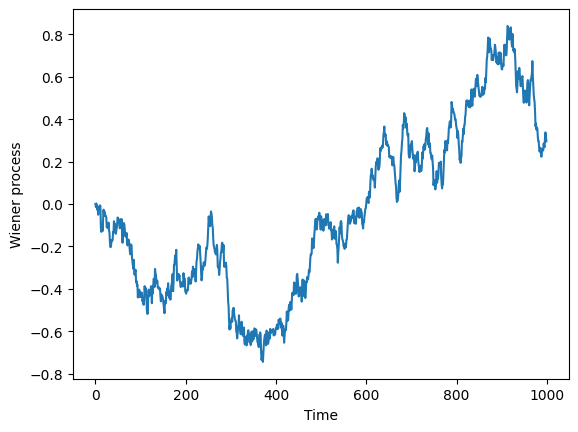

In [9]:
plt.xlabel("Time")
plt.ylabel("Wiener process")
plt.plot(range(N), w)
plt.show()

In [10]:
t = np.linspace(0, delta_t * (N - 1), N)
s = S_0 * np.exp((mu - 0.5 * (sigma ** 2)) * t + sigma * w)

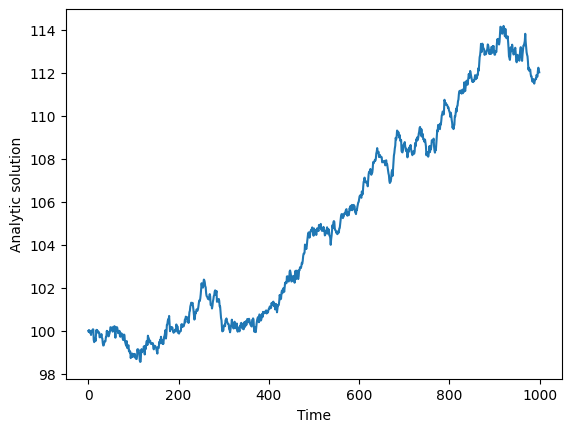

In [11]:
plt.xlabel("Time")
plt.ylabel("Analytic solution")
plt.plot(range(N), s)
plt.show()

In [12]:
y_e = np.zeros(N)
y_e[0] = S_0
for i in range(1, N):
    y_e[i] = y_e[i - 1] + mu * y_e[i - 1] * delta_t + sigma * y_e[i - 1] * delta_w[i]


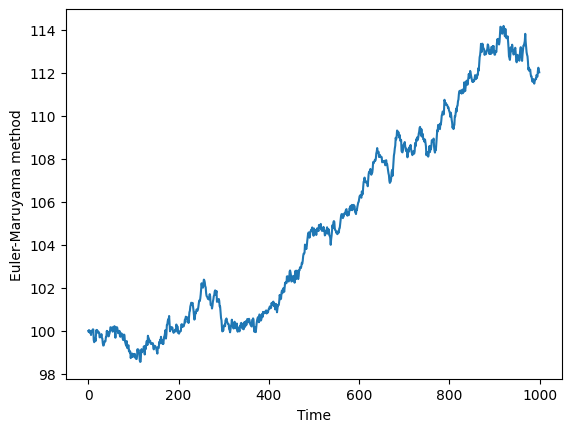

In [13]:
plt.xlabel("Time")
plt.ylabel("Euler-Maruyama method")
plt.plot(range(N), y_e)
plt.show()

In [15]:
y_m = np.zeros(N)
y_m[0] = S_0 
for i in range(1, N):
    y_m[i] = y_m[i - 1] + mu * y_m[i - 1] * delta_t + \
                    sigma * y_m[i - 1] * delta_w[i] + \
                    0.5 * sigma**2 * y_m[i - 1] * (delta_w[i] ** 2 - delta_t)

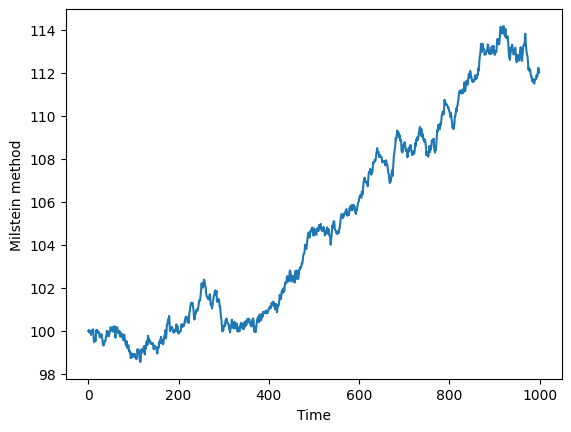

In [16]:
plt.xlabel("Time")
plt.ylabel("Milstein method")
plt.plot(range(N), y_m)
plt.show()

## Experiment

In [19]:
S_0 = 100
mu = 0.1
sigma = 0.05
T = 1
N = 50

In [24]:
errors = {"e": [], "m": []}

for h in [0.01, 0.01 / 2, 0.01 / 4]:
    n = int(T/h)
    err_e = np.zeros(N)
    err_m = np.zeros(N)

    for _ in range(N):

        # calculate wiener process trajectory
        delta_w = np.random.normal(0, np.sqrt(h), n)
        delta_w[0] = 0
        w = np.cumsum(delta_w)

        # analytic solution
        t = np.linspace(0, h * (n - 1), n)
        s = S_0 * np.exp((mu - 0.5 * (sigma ** 2)) * t + sigma * w)

        # euler-maruyama method
        y_e = np.zeros(n)
        y_e[0] = S_0
        for i in range(1, n):
            y_e[i] = y_e[i - 1] + mu * y_e[i - 1] * h + sigma * y_e[i - 1] * delta_w[i]

        # milstein method
        y_m = np.zeros(n)
        y_m[0] = S_0
        for i in range(1, n):
            y_m[i] = y_m[i - 1] + mu * y_m[i - 1] * h + \
                            sigma * y_m[i - 1] * delta_w[i] + \
                            0.5 * sigma**2 * y_m[i - 1] * (delta_w[i] ** 2 - h)
        
        err_e[_] = np.mean(np.abs(s - y_e))
        err_m[_] = np.mean(np.abs(s - y_m))
    
    errors["e"].append(round(np.mean(err_e), 7))
    errors["m"].append(round(np.mean(err_m), 7))

In [25]:
errors

{'e': [0.0087627, 0.0079965, 0.0052684],
 'm': [0.0036508, 0.0017278, 0.0008981]}

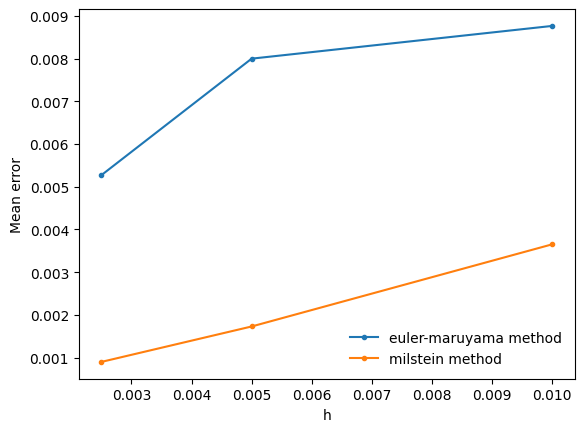

In [29]:
plt.xlabel("h")
plt.ylabel("Mean error")
plt.plot([0.01, 0.01 / 2, 0.01 / 4], errors["e"],  marker='.', label="euler-maruyama method")
plt.plot([0.01, 0.01 / 2, 0.01 / 4], errors["m"], marker='.', label="milstein method")
plt.legend(frameon=False)
plt.show()

In [35]:
errors["e"][1] / errors["e"][2]

1.5178232480449472